# DNN Lab

## Objectives
-  Understand basic DNN model building process using Keras
-  Analyze model performance and capacity vs generalization tradeoff
-  Modify models to reduce overfitting and improve performance

## Exercises
-  Build a DNN model for slump Test Problem
-  Start with a model consisting of one hidden layer with 7 neurons
-  Analyze results and explore improvements to model in terms of capacity, regularization





### Step 1: Import Libraries

In [1]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.3.0


### Step 2: Import Data

In [8]:

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

concrete_dataframe = pd.read_csv("slump_test.data", sep=",")

## why reindex here 
concrete_dataframe = concrete_dataframe.reindex(
    np.random.permutation(concrete_dataframe.index))


      No  Cement  Slag  ...  SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)
0      1   273.0  82.0  ...       23.0      62.0                                35.0
1      2   163.0 149.0  ...        0.0      20.0                                41.1
2      3   162.0 148.0  ...        1.0      20.0                                41.8
3      4   162.0 148.0  ...        3.0      21.5                                42.1
4      5   154.0 112.0  ...       20.0      64.0                                26.8
..   ...     ...   ...  ...        ...       ...                                 ...
98    99   248.3 101.0  ...        0.0      20.0                                50.0
99   100   248.0 101.0  ...        2.0      20.0                                50.2
100  101   258.8  88.0  ...        0.0      20.0                                50.5
101  102   297.1  40.9  ...       27.5      67.0                                49.2
102  103   348.7   0.1  ...       29.0      78.0                 

In [ ]:
concrete_dataframe.shape[0]

103

### Step 3: Preprocess

In [9]:
def preprocess_features(concrete_dataframe):
  """Prepares input features from concrete slump test data set.

  Args:
    concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = concrete_dataframe[
    ["Cement",
     "Slag",
     "Fly ash",
     "Water",
     "SP",
     "Coarse Aggr.",
     "Fine Aggr."]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(concrete_dataframe):
  """Prepares target features (i.e., labels) from  housing data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = concrete_dataframe["Compressive Strength (28-day)(Mpa)"]
  return output_targets

**Train/Validation Split**

In [13]:

# Choose the first 83 examples for training.
training_examples=preprocess_features(concrete_dataframe.head(83))
training_targets = preprocess_targets(concrete_dataframe.head(83))

# Choose the 20 examples for validation.
validation_examples=preprocess_features(concrete_dataframe.tail(20))
validation_targets=preprocess_targets(concrete_dataframe.tail(20))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
count,83.0,83.0,83.0,83.0,83.0,83.0,83.0
mean,234.1,78.9,148.2,198.2,8.6,874.5,742.2
std,79.4,61.7,85.2,20.3,2.7,85.8,65.0
min,140.0,0.0,0.0,160.0,4.4,721.0,640.9
25%,153.5,0.0,115.5,181.0,6.0,799.0,684.5
50%,258.8,99.0,164.0,200.0,8.3,871.0,745.0
75%,305.5,127.5,235.9,210.0,10.0,926.1,788.0
max,374.0,193.0,260.0,240.0,19.0,1049.9,902.0


Validation examples summary:


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,212.5,74.2,152.2,192.9,8.3,923.4,729.0
std,76.2,56.6,88.4,19.7,3.1,90.1,56.4
min,137.0,0.0,0.0,168.0,4.6,708.0,640.6
25%,141.8,3.3,127.0,175.5,6.0,858.5,691.6
50%,158.5,100.5,172.5,191.4,7.8,947.5,717.5
75%,292.8,114.5,221.7,205.0,10.0,991.5,786.0
max,322.0,167.0,246.0,231.0,18.0,1049.5,821.0


Training targets summary:


count   83.0
mean    36.4
std      8.2
min     17.2
25%     31.4
50%     36.2
75%     41.7
max     58.5
Name: Compressive Strength (28-day)(Mpa), dtype: float64

Validation targets summary:


count   20.0
mean    34.4
std      6.1
min     26.4
25%     30.3
50%     33.8
75%     36.4
max     50.0
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Step 4: Build Model

https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

https://keras.io/optimizers/

In [ ]:
training_examples.shape

#training_targets.shape

(83, 7)

**Build Model**

In [21]:
baseline_model=keras.Sequential([keras.layers.Dense(4,activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
                       keras.layers.Dense(1)])

baseline_model.compile(loss='mse',optimizer="rmsprop",metrics=['mae'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


**Fit Model**

In [22]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

**Lowest Validation Error**

In [43]:
print(min(b_history.history['val_mae']))

# Choose the first 83 examples for training.
training_examples = preprocess_features(concrete_dataframe.head(83))
training_targets = preprocess_targets(concrete_dataframe.head(83))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 20 examples for validation.
validation_examples = preprocess_features(concrete_dataframe.tail(20))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(concrete_dataframe.tail(20))


l1_model=keras.Sequential([
            keras.layers.Dense(32,kernel_regularizer=keras.regularizers.l1(0.1),activation=tf.nn.relu,input_shape=(training_examples.shape[1],)),
            keras.layers.Dense(32,use_bias=True,kernel_regularizer=keras.regularizers.l1(0.01),activation=tf.nn.relu),
            keras.layers.Dense(32,use_bias=True,kernel_regularizer=keras.regularizers.l1(0.01),activation=tf.nn.relu),
            keras.layers.Dense(32,use_bias=True,kernel_regularizer=keras.regularizers.l1(0.01),activation=tf.nn.relu),
            keras.layers.Dense(1)]) 
l1_model.compile(loss='mse',optimizer="rmsprop",metrics=['mae'])

l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
print("finish l1 ")
l2_model=keras.Sequential([
keras.layers.Dense(10,kernel_regularizer=keras.regularizers.l2(0.1),activation=tf.nn.relu,input_shape=(training_examples.shape[1],)),
keras.layers.Dropout(0.25),
keras.layers.Dense(10,kernel_regularizer=keras.regularizers.l2(0.1),activation=tf.nn.relu),
keras.layers.Dropout(0.25),
keras.layers.Dense(10,kernel_regularizer=keras.regularizers.l2(0.1),activation=tf.nn.relu),
keras.layers.Dropout(0.25),
keras.layers.Dense(10,kernel_regularizer=keras.regularizers.l2(0.1),activation=tf.nn.relu),
keras.layers.Dense(1)
])

l2_model.compile(loss='mse',optimizer="rmsprop",metrics=['mae'])

l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
print("finish l2")

3.644069194793701

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................................

### Step 5: Plot Results

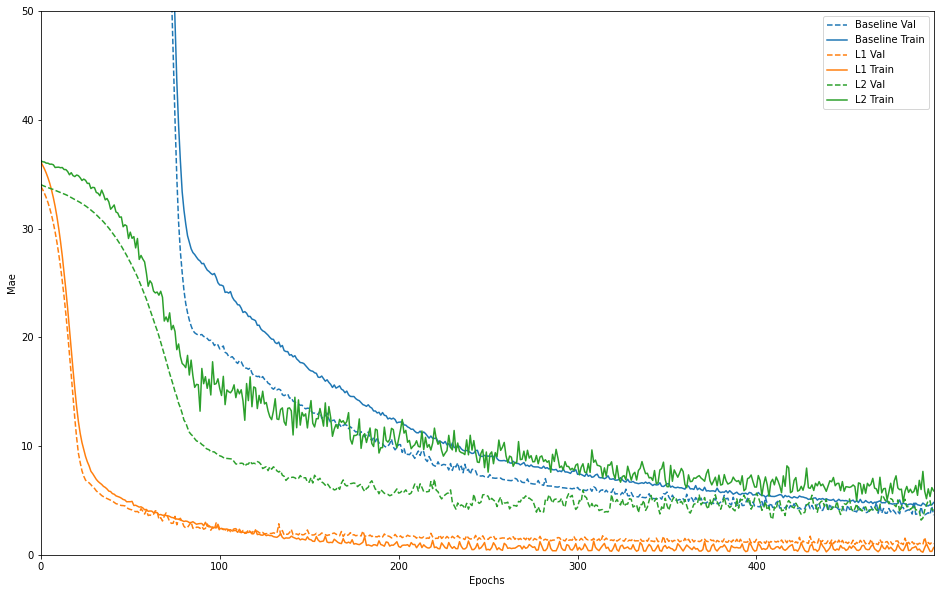

In [46]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mae'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,50])
  
plot_history([('baseline',b_history),('L1',l1_history),('L2',l2_history)])
  

### Predictions

In [47]:
valpreds = baseline_model.predict_on_batch(validation_examples)
print(valpreds)

[[-0.18896003]
 [ 0.34387326]
 [ 1.0055695 ]
 [ 0.2558768 ]
 [ 0.6641883 ]
 [-0.1504335 ]
 [ 0.08530763]
 [-0.5231406 ]
 [ 0.00798285]
 [-0.7133322 ]
 [-0.36520046]
 [-0.41224653]
 [ 0.60352415]
 [ 0.21925719]
 [ 0.0261942 ]
 [ 0.46359247]
 [-0.12306465]
 [ 0.5323409 ]
 [ 0.227642  ]
 [ 0.87641037]]


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)

79   30.4
76   32.6
34   34.5
54   45.4
4    26.8
83   36.3
63   30.4
36   33.1
85   31.0
21   36.2
57   29.6
43   27.6
98   50.0
24   36.7
38   35.0
6    38.9
80   26.4
90   35.5
20   29.8
28   41.3
Name: Compressive Strength (28-day)(Mpa), dtype: float64


<BarContainer object of 4 artists>

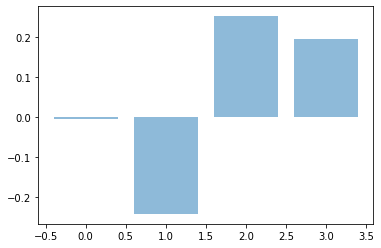

In [49]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)